# EVALUATING DIFFERENT CNN CHARACTERISTICS

In [1]:
# importing needed packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim

## Prepare for Dataset

In [2]:
#Loading our data from CIFAR10, tranforming it to tensor and normalizing
# Creating the type classes that are in the data

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


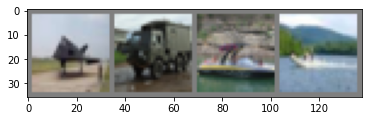

plane truck  ship  ship


In [3]:
# The function to show image.
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Choose a Device

In [4]:
# If there are GPUs, choose the first one for computing. Otherwise use CPU.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
# If 'cuda:0' is printed, it means GPU is available.

cuda:0


## Evaluations

### Network (Avgpooling and Relu)

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.relu = nn.ReLU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.relu = nn.ReLU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.relu = nn.ReLU()
        self.avgpool3 = nn.AvgPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.avgpool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.avgpool2(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.avgpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.ReLU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net1 = Net()     # Create the network instance.
net1.to(device)  # Move the network parameters to the specified device.

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (avgpool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (avgpool3): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [6]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net1.parameters(), lr=0.001) 

#### Training Procedure

In [7]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net1(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

[epoch: 0, i:    99] avg mini-batch loss: 4.152
[epoch: 0, i:   199] avg mini-batch loss: 4.137
[epoch: 0, i:   299] avg mini-batch loss: 4.119
[epoch: 0, i:   399] avg mini-batch loss: 4.101
[epoch: 0, i:   499] avg mini-batch loss: 4.081
[epoch: 0, i:   599] avg mini-batch loss: 4.057
[epoch: 0, i:   699] avg mini-batch loss: 4.029
[epoch: 0, i:   799] avg mini-batch loss: 3.987
[epoch: 0, i:   899] avg mini-batch loss: 3.928
[epoch: 0, i:   999] avg mini-batch loss: 3.814
[epoch: 0, i:  1099] avg mini-batch loss: 3.605
[epoch: 0, i:  1199] avg mini-batch loss: 3.136
[epoch: 0, i:  1299] avg mini-batch loss: 2.675
[epoch: 0, i:  1399] avg mini-batch loss: 2.425
[epoch: 0, i:  1499] avg mini-batch loss: 2.395
[epoch: 0, i:  1599] avg mini-batch loss: 2.358
[epoch: 0, i:  1699] avg mini-batch loss: 2.356
[epoch: 0, i:  1799] avg mini-batch loss: 2.339
[epoch: 0, i:  1899] avg mini-batch loss: 2.323
[epoch: 0, i:  1999] avg mini-batch loss: 2.325
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

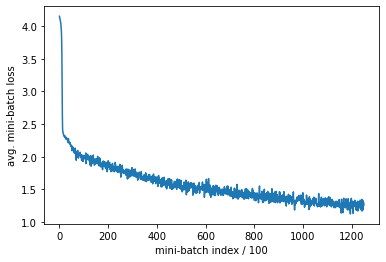

In [8]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [9]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [10]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net1(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 75 %
Accuracy of  bird : 44 %
Accuracy of   cat : 31 %
Accuracy of  deer : 38 %
Accuracy of   dog : 44 %
Accuracy of  frog : 66 %
Accuracy of horse : 63 %
Accuracy of  ship : 74 %
Accuracy of truck : 61 %


### Adam Optimizer and Loss Function

In [11]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net1.parameters(), lr=0.001) 

#### Training Procedure

In [12]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net1(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.525
[epoch: 0, i:   199] avg mini-batch loss: 1.947
[epoch: 0, i:   299] avg mini-batch loss: 1.938
[epoch: 0, i:   399] avg mini-batch loss: 1.836
[epoch: 0, i:   499] avg mini-batch loss: 1.850
[epoch: 0, i:   599] avg mini-batch loss: 1.673
[epoch: 0, i:   699] avg mini-batch loss: 1.757
[epoch: 0, i:   799] avg mini-batch loss: 1.648
[epoch: 0, i:   899] avg mini-batch loss: 1.640
[epoch: 0, i:   999] avg mini-batch loss: 1.652
[epoch: 0, i:  1099] avg mini-batch loss: 1.700
[epoch: 0, i:  1199] avg mini-batch loss: 1.618
[epoch: 0, i:  1299] avg mini-batch loss: 1.622
[epoch: 0, i:  1399] avg mini-batch loss: 1.593
[epoch: 0, i:  1499] avg mini-batch loss: 1.570
[epoch: 0, i:  1599] avg mini-batch loss: 1.577
[epoch: 0, i:  1699] avg mini-batch loss: 1.555
[epoch: 0, i:  1799] avg mini-batch loss: 1.600
[epoch: 0, i:  1899] avg mini-batch loss: 1.579
[epoch: 0, i:  1999] avg mini-batch loss: 1.557
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

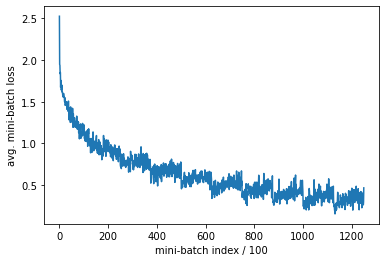

In [13]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [14]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 72 %


In [15]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net1(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 84 %
Accuracy of  bird : 61 %
Accuracy of   cat : 64 %
Accuracy of  deer : 70 %
Accuracy of   dog : 54 %
Accuracy of  frog : 77 %
Accuracy of horse : 74 %
Accuracy of  ship : 85 %
Accuracy of truck : 82 %


## Part 2

### Network (Max pooling and relu)

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.relu = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.relu = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.ReLU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net2 = Net()     # Create the network instance.
net2.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [17]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net2.parameters(), lr=0.001) 

#### Training Procedure

In [18]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net2(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.134
[epoch: 0, i:   199] avg mini-batch loss: 4.098
[epoch: 0, i:   299] avg mini-batch loss: 4.048
[epoch: 0, i:   399] avg mini-batch loss: 3.966
[epoch: 0, i:   499] avg mini-batch loss: 3.806
[epoch: 0, i:   599] avg mini-batch loss: 3.407
[epoch: 0, i:   699] avg mini-batch loss: 2.761
[epoch: 0, i:   799] avg mini-batch loss: 2.425
[epoch: 0, i:   899] avg mini-batch loss: 2.375
[epoch: 0, i:   999] avg mini-batch loss: 2.344
[epoch: 0, i:  1099] avg mini-batch loss: 2.343
[epoch: 0, i:  1199] avg mini-batch loss: 2.329
[epoch: 0, i:  1299] avg mini-batch loss: 2.330
[epoch: 0, i:  1399] avg mini-batch loss: 2.342
[epoch: 0, i:  1499] avg mini-batch loss: 2.327
[epoch: 0, i:  1599] avg mini-batch loss: 2.306
[epoch: 0, i:  1699] avg mini-batch loss: 2.307
[epoch: 0, i:  1799] avg mini-batch loss: 2.311
[epoch: 0, i:  1899] avg mini-batch loss: 2.311
[epoch: 0, i:  1999] avg mini-batch loss: 2.302
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

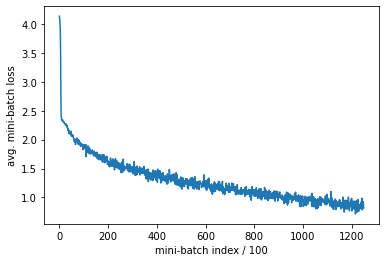

In [19]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [20]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [21]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 73 %
Accuracy of  bird : 65 %
Accuracy of   cat : 44 %
Accuracy of  deer : 63 %
Accuracy of   dog : 50 %
Accuracy of  frog : 71 %
Accuracy of horse : 68 %
Accuracy of  ship : 74 %
Accuracy of truck : 84 %


### Adam Optimizer and Loss Function

In [22]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net2.parameters(), lr=0.001) 

#### Training Procedure

In [23]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net2(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.696
[epoch: 0, i:   199] avg mini-batch loss: 2.002
[epoch: 0, i:   299] avg mini-batch loss: 1.862
[epoch: 0, i:   399] avg mini-batch loss: 1.749
[epoch: 0, i:   499] avg mini-batch loss: 1.666
[epoch: 0, i:   599] avg mini-batch loss: 1.674
[epoch: 0, i:   699] avg mini-batch loss: 1.634
[epoch: 0, i:   799] avg mini-batch loss: 1.618
[epoch: 0, i:   899] avg mini-batch loss: 1.563
[epoch: 0, i:   999] avg mini-batch loss: 1.604
[epoch: 0, i:  1099] avg mini-batch loss: 1.611
[epoch: 0, i:  1199] avg mini-batch loss: 1.551
[epoch: 0, i:  1299] avg mini-batch loss: 1.520
[epoch: 0, i:  1399] avg mini-batch loss: 1.476
[epoch: 0, i:  1499] avg mini-batch loss: 1.482
[epoch: 0, i:  1599] avg mini-batch loss: 1.422
[epoch: 0, i:  1699] avg mini-batch loss: 1.613
[epoch: 0, i:  1799] avg mini-batch loss: 1.568
[epoch: 0, i:  1899] avg mini-batch loss: 1.498
[epoch: 0, i:  1999] avg mini-batch loss: 1.381
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

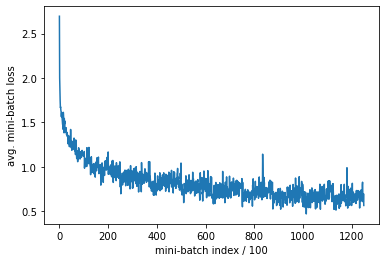

In [24]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [25]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 69 %


In [26]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net2(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 83 %
Accuracy of   car : 83 %
Accuracy of  bird : 57 %
Accuracy of   cat : 60 %
Accuracy of  deer : 60 %
Accuracy of   dog : 53 %
Accuracy of  frog : 65 %
Accuracy of horse : 75 %
Accuracy of  ship : 72 %
Accuracy of truck : 85 %


## Part 3

### Network (Avg Pooling and ELU)

In [27]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.elu = nn.ELU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.elu = nn.ELU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.elu = nn.ELU()
        self.avgpool3 = nn.AvgPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.elu = nn.ELU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.elu(x)
        x = self.avgpool1(x)
        
        x = self.conv2(x)
        x = self.elu(x)
        x = self.avgpool2(x)

        x = self.conv3(x)
        x = self.elu(x)
        x = self.avgpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.ELU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net3 = Net()     # Create the network instance.
net3.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (elu): ELU(alpha=1.0)
  (avgpool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (avgpool3): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [28]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net3.parameters(), lr=0.001) 

#### Training Procedure

In [29]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net3(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 3.213
[epoch: 0, i:   199] avg mini-batch loss: 2.602
[epoch: 0, i:   299] avg mini-batch loss: 3.176
[epoch: 0, i:   399] avg mini-batch loss: 2.792
[epoch: 0, i:   499] avg mini-batch loss: 2.540
[epoch: 0, i:   599] avg mini-batch loss: 2.455
[epoch: 0, i:   699] avg mini-batch loss: 2.435
[epoch: 0, i:   799] avg mini-batch loss: 2.616
[epoch: 0, i:   899] avg mini-batch loss: 2.511
[epoch: 0, i:   999] avg mini-batch loss: 2.532
[epoch: 0, i:  1099] avg mini-batch loss: 4.503
[epoch: 0, i:  1199] avg mini-batch loss: 2.912
[epoch: 0, i:  1299] avg mini-batch loss: 2.587
[epoch: 0, i:  1399] avg mini-batch loss: 2.522
[epoch: 0, i:  1499] avg mini-batch loss: 2.405
[epoch: 0, i:  1599] avg mini-batch loss: 2.463
[epoch: 0, i:  1699] avg mini-batch loss: 2.540
[epoch: 0, i:  1799] avg mini-batch loss: 2.387
[epoch: 0, i:  1899] avg mini-batch loss: 2.496
[epoch: 0, i:  1999] avg mini-batch loss: 2.425
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

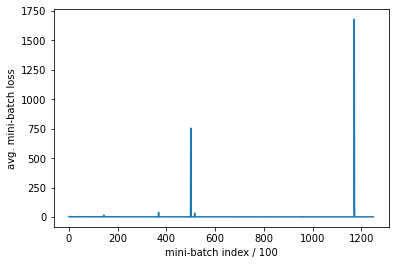

In [30]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [31]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 50 %


In [32]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net3(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 59 %
Accuracy of   car : 59 %
Accuracy of  bird : 21 %
Accuracy of   cat : 87 %
Accuracy of  deer : 38 %
Accuracy of   dog :  0 %
Accuracy of  frog : 40 %
Accuracy of horse : 64 %
Accuracy of  ship : 50 %
Accuracy of truck : 80 %


### Adam Optimizer and Loss Function

In [33]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net3.parameters(), lr=0.001) 

#### Training Procedure

In [34]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net3(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 1.867
[epoch: 0, i:   199] avg mini-batch loss: 1.442
[epoch: 0, i:   299] avg mini-batch loss: 1.429
[epoch: 0, i:   399] avg mini-batch loss: 1.522
[epoch: 0, i:   499] avg mini-batch loss: 1.425
[epoch: 0, i:   599] avg mini-batch loss: 1.476
[epoch: 0, i:   699] avg mini-batch loss: 1.443
[epoch: 0, i:   799] avg mini-batch loss: 1.567
[epoch: 0, i:   899] avg mini-batch loss: 1.455
[epoch: 0, i:   999] avg mini-batch loss: 1.427
[epoch: 0, i:  1099] avg mini-batch loss: 1.315
[epoch: 0, i:  1199] avg mini-batch loss: 1.481
[epoch: 0, i:  1299] avg mini-batch loss: 1.592
[epoch: 0, i:  1399] avg mini-batch loss: 1.426
[epoch: 0, i:  1499] avg mini-batch loss: 1.489
[epoch: 0, i:  1599] avg mini-batch loss: 1.550
[epoch: 0, i:  1699] avg mini-batch loss: 1.346
[epoch: 0, i:  1799] avg mini-batch loss: 1.429
[epoch: 0, i:  1899] avg mini-batch loss: 1.411
[epoch: 0, i:  1999] avg mini-batch loss: 1.516
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

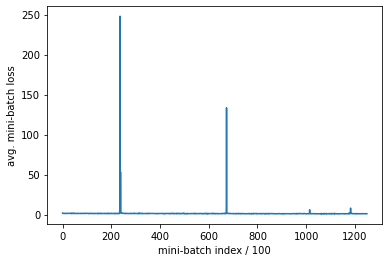

In [35]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [36]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [37]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net3(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 78 %
Accuracy of  bird : 56 %
Accuracy of   cat : 80 %
Accuracy of  deer : 52 %
Accuracy of   dog : 15 %
Accuracy of  frog : 73 %
Accuracy of horse : 64 %
Accuracy of  ship : 66 %
Accuracy of truck : 63 %


## Part 4

### Network (Max Pooling and ELU)

In [38]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.elu = nn.ELU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.elu = nn.ELU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.elu = nn.ELU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.elu = nn.ELU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.elu(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.elu(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.elu(x)
        x = self.maxpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.ELU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net4 = Net()     # Create the network instance.
net4.to(device)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (elu): ELU(alpha=1.0)
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [39]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net4.parameters(), lr=0.001) 

#### Training Procedure

In [40]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net4(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.108
[epoch: 0, i:   199] avg mini-batch loss: 3.986
[epoch: 0, i:   299] avg mini-batch loss: 3.784
[epoch: 0, i:   399] avg mini-batch loss: 3.381
[epoch: 0, i:   499] avg mini-batch loss: 2.793
[epoch: 0, i:   599] avg mini-batch loss: 2.478
[epoch: 0, i:   699] avg mini-batch loss: 2.371
[epoch: 0, i:   799] avg mini-batch loss: 2.316
[epoch: 0, i:   899] avg mini-batch loss: 2.290
[epoch: 0, i:   999] avg mini-batch loss: 2.269
[epoch: 0, i:  1099] avg mini-batch loss: 2.238
[epoch: 0, i:  1199] avg mini-batch loss: 2.226
[epoch: 0, i:  1299] avg mini-batch loss: 2.222
[epoch: 0, i:  1399] avg mini-batch loss: 2.238
[epoch: 0, i:  1499] avg mini-batch loss: 2.181
[epoch: 0, i:  1599] avg mini-batch loss: 2.184
[epoch: 0, i:  1699] avg mini-batch loss: 2.141
[epoch: 0, i:  1799] avg mini-batch loss: 2.133
[epoch: 0, i:  1899] avg mini-batch loss: 2.124
[epoch: 0, i:  1999] avg mini-batch loss: 2.097
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

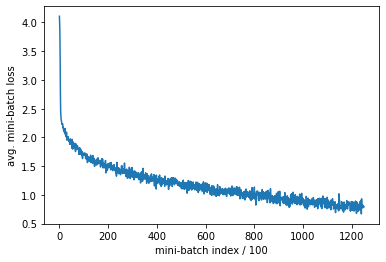

In [41]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [42]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 69 %


In [43]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 72 %
Accuracy of   car : 79 %
Accuracy of  bird : 63 %
Accuracy of   cat : 37 %
Accuracy of  deer : 60 %
Accuracy of   dog : 65 %
Accuracy of  frog : 82 %
Accuracy of horse : 77 %
Accuracy of  ship : 78 %
Accuracy of truck : 75 %


### Adam Optimizer and Loss Function

In [44]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net4.parameters(), lr=0.001) 

#### Training Procedure


In [45]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net4(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.555
[epoch: 0, i:   199] avg mini-batch loss: 2.322
[epoch: 0, i:   299] avg mini-batch loss: 2.142
[epoch: 0, i:   399] avg mini-batch loss: 2.062
[epoch: 0, i:   499] avg mini-batch loss: 2.014
[epoch: 0, i:   599] avg mini-batch loss: 2.002
[epoch: 0, i:   699] avg mini-batch loss: 2.015
[epoch: 0, i:   799] avg mini-batch loss: 2.243
[epoch: 0, i:   899] avg mini-batch loss: 1.915
[epoch: 0, i:   999] avg mini-batch loss: 2.080
[epoch: 0, i:  1099] avg mini-batch loss: 2.215
[epoch: 0, i:  1199] avg mini-batch loss: 2.132
[epoch: 0, i:  1299] avg mini-batch loss: 2.041
[epoch: 0, i:  1399] avg mini-batch loss: 2.051
[epoch: 0, i:  1499] avg mini-batch loss: 2.009
[epoch: 0, i:  1599] avg mini-batch loss: 2.111
[epoch: 0, i:  1699] avg mini-batch loss: 2.091
[epoch: 0, i:  1799] avg mini-batch loss: 2.174
[epoch: 0, i:  1899] avg mini-batch loss: 2.207
[epoch: 0, i:  1999] avg mini-batch loss: 2.299
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

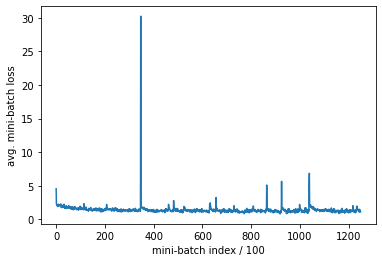

In [46]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [47]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [48]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net4(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 74 %
Accuracy of  bird : 71 %
Accuracy of   cat : 41 %
Accuracy of  deer : 44 %
Accuracy of   dog : 45 %
Accuracy of  frog : 65 %
Accuracy of horse : 82 %
Accuracy of  ship : 84 %
Accuracy of truck : 70 %


## Part 5

### Network (Avg Pooling and Leaky Relu)

In [49]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.lrelu = nn.LeakyReLU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.lrelu = nn.LeakyReLU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.lrelu = nn.LeakyReLU()
        self.avgpool3 = nn.AvgPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.lrelu = nn.LeakyReLU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.lrelu(x)
        x = self.avgpool1(x)
        
        x = self.conv2(x)
        x = self.lrelu(x)
        x = self.avgpool2(x)

        x = self.conv3(x)
        x = self.lrelu(x)
        x = self.avgpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.LeakyReLU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net5 = Net()     # Create the network instance.
net5.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (lrelu): LeakyReLU(negative_slope=0.01)
  (avgpool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (avgpool3): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [50]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net5.parameters(), lr=0.001) 

#### Training Procedure

In [51]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net5(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.152
[epoch: 0, i:   199] avg mini-batch loss: 4.134
[epoch: 0, i:   299] avg mini-batch loss: 4.120
[epoch: 0, i:   399] avg mini-batch loss: 4.100
[epoch: 0, i:   499] avg mini-batch loss: 4.078
[epoch: 0, i:   599] avg mini-batch loss: 4.052
[epoch: 0, i:   699] avg mini-batch loss: 4.015
[epoch: 0, i:   799] avg mini-batch loss: 3.967
[epoch: 0, i:   899] avg mini-batch loss: 3.889
[epoch: 0, i:   999] avg mini-batch loss: 3.747
[epoch: 0, i:  1099] avg mini-batch loss: 3.436
[epoch: 0, i:  1199] avg mini-batch loss: 2.885
[epoch: 0, i:  1299] avg mini-batch loss: 2.520
[epoch: 0, i:  1399] avg mini-batch loss: 2.405
[epoch: 0, i:  1499] avg mini-batch loss: 2.346
[epoch: 0, i:  1599] avg mini-batch loss: 2.349
[epoch: 0, i:  1699] avg mini-batch loss: 2.332
[epoch: 0, i:  1799] avg mini-batch loss: 2.331
[epoch: 0, i:  1899] avg mini-batch loss: 2.336
[epoch: 0, i:  1999] avg mini-batch loss: 2.306
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

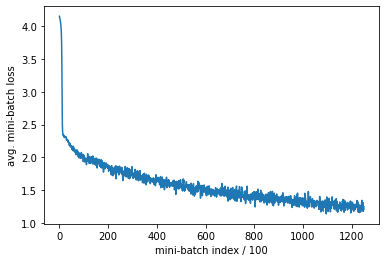

In [52]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [53]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [54]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net5(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 62 %
Accuracy of  bird : 23 %
Accuracy of   cat : 31 %
Accuracy of  deer : 59 %
Accuracy of   dog : 63 %
Accuracy of  frog : 59 %
Accuracy of horse : 57 %
Accuracy of  ship : 68 %
Accuracy of truck : 65 %


### Adam Optimizer and Loss Function

In [55]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net5.parameters(), lr=0.001) 

#### Training Procedure

In [56]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net5(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.153
[epoch: 0, i:   199] avg mini-batch loss: 1.956
[epoch: 0, i:   299] avg mini-batch loss: 1.784
[epoch: 0, i:   399] avg mini-batch loss: 1.741
[epoch: 0, i:   499] avg mini-batch loss: 1.770
[epoch: 0, i:   599] avg mini-batch loss: 1.683
[epoch: 0, i:   699] avg mini-batch loss: 1.685
[epoch: 0, i:   799] avg mini-batch loss: 1.708
[epoch: 0, i:   899] avg mini-batch loss: 1.652
[epoch: 0, i:   999] avg mini-batch loss: 1.727
[epoch: 0, i:  1099] avg mini-batch loss: 1.543
[epoch: 0, i:  1199] avg mini-batch loss: 1.664
[epoch: 0, i:  1299] avg mini-batch loss: 1.621
[epoch: 0, i:  1399] avg mini-batch loss: 1.493
[epoch: 0, i:  1499] avg mini-batch loss: 1.598
[epoch: 0, i:  1599] avg mini-batch loss: 1.607
[epoch: 0, i:  1699] avg mini-batch loss: 1.556
[epoch: 0, i:  1799] avg mini-batch loss: 1.534
[epoch: 0, i:  1899] avg mini-batch loss: 1.638
[epoch: 0, i:  1999] avg mini-batch loss: 1.611
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

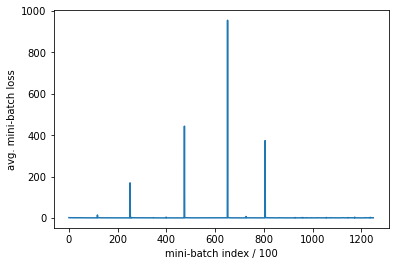

In [57]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [58]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


In [59]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net5(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 76 %
Accuracy of   car : 70 %
Accuracy of  bird : 36 %
Accuracy of   cat : 44 %
Accuracy of  deer : 41 %
Accuracy of   dog : 52 %
Accuracy of  frog : 40 %
Accuracy of horse : 81 %
Accuracy of  ship : 76 %
Accuracy of truck : 57 %


## Part 6

### Network (Max Pooling and Leaky Relu)

In [60]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.lrelu = nn.LeakyReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.lrelu = nn.LeakyReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.lrelu = nn.LeakyReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.lrelu = nn.LeakyReLU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.lrelu(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.lrelu(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.lrelu(x)
        x = self.maxpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.LeakyReLU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net6 = Net()     # Create the network instance.
net6.to(device)

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (lrelu): LeakyReLU(negative_slope=0.01)
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [61]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net6.parameters(), lr=0.001) 

#### Training Procedure

In [62]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net6(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.141
[epoch: 0, i:   199] avg mini-batch loss: 4.096
[epoch: 0, i:   299] avg mini-batch loss: 4.040
[epoch: 0, i:   399] avg mini-batch loss: 3.939
[epoch: 0, i:   499] avg mini-batch loss: 3.742
[epoch: 0, i:   599] avg mini-batch loss: 3.270
[epoch: 0, i:   699] avg mini-batch loss: 2.654
[epoch: 0, i:   799] avg mini-batch loss: 2.422
[epoch: 0, i:   899] avg mini-batch loss: 2.367
[epoch: 0, i:   999] avg mini-batch loss: 2.339
[epoch: 0, i:  1099] avg mini-batch loss: 2.341
[epoch: 0, i:  1199] avg mini-batch loss: 2.324
[epoch: 0, i:  1299] avg mini-batch loss: 2.311
[epoch: 0, i:  1399] avg mini-batch loss: 2.321
[epoch: 0, i:  1499] avg mini-batch loss: 2.290
[epoch: 0, i:  1599] avg mini-batch loss: 2.298
[epoch: 0, i:  1699] avg mini-batch loss: 2.294
[epoch: 0, i:  1799] avg mini-batch loss: 2.275
[epoch: 0, i:  1899] avg mini-batch loss: 2.279
[epoch: 0, i:  1999] avg mini-batch loss: 2.261
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

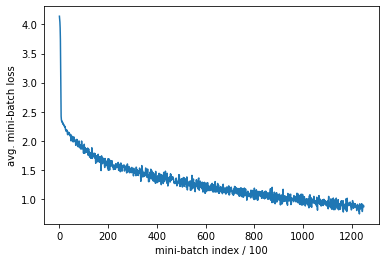

In [63]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [64]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [65]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net6(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 76 %
Accuracy of  bird : 57 %
Accuracy of   cat : 49 %
Accuracy of  deer : 62 %
Accuracy of   dog : 50 %
Accuracy of  frog : 74 %
Accuracy of horse : 78 %
Accuracy of  ship : 88 %
Accuracy of truck : 73 %


### Adam Optimizer and Loss Function

In [66]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net6.parameters(), lr=0.001) 

#### Training Procedure

In [67]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net6(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.348
[epoch: 0, i:   199] avg mini-batch loss: 1.914
[epoch: 0, i:   299] avg mini-batch loss: 1.828
[epoch: 0, i:   399] avg mini-batch loss: 1.779
[epoch: 0, i:   499] avg mini-batch loss: 1.670
[epoch: 0, i:   599] avg mini-batch loss: 1.673
[epoch: 0, i:   699] avg mini-batch loss: 1.591
[epoch: 0, i:   799] avg mini-batch loss: 1.653
[epoch: 0, i:   899] avg mini-batch loss: 1.593
[epoch: 0, i:   999] avg mini-batch loss: 1.536
[epoch: 0, i:  1099] avg mini-batch loss: 1.452
[epoch: 0, i:  1199] avg mini-batch loss: 1.685
[epoch: 0, i:  1299] avg mini-batch loss: 1.465
[epoch: 0, i:  1399] avg mini-batch loss: 1.568
[epoch: 0, i:  1499] avg mini-batch loss: 1.519
[epoch: 0, i:  1599] avg mini-batch loss: 1.460
[epoch: 0, i:  1699] avg mini-batch loss: 1.562
[epoch: 0, i:  1799] avg mini-batch loss: 1.468
[epoch: 0, i:  1899] avg mini-batch loss: 1.394
[epoch: 0, i:  1999] avg mini-batch loss: 1.332
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

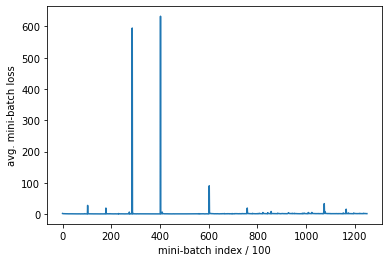

In [68]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [69]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net6(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 38 %


In [70]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net6(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 12 %
Accuracy of   car : 48 %
Accuracy of  bird :  4 %
Accuracy of   cat :  0 %
Accuracy of  deer : 65 %
Accuracy of   dog : 44 %
Accuracy of  frog : 57 %
Accuracy of horse : 33 %
Accuracy of  ship : 64 %
Accuracy of truck : 54 %


## Part 7

### Network (AvgPooling and Tanh)

In [71]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.tahn = nn.Tanh()
        self.avgpool1 = nn.AvgPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.tahn = nn.Tanh()
        self.avgpool2 = nn.AvgPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.tahn = nn.Tanh()
        self.avgpool3 = nn.AvgPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.tahn = nn.Tanh()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.tahn(x)
        x = self.avgpool1(x)
        
        x = self.conv2(x)
        x = self.tahn(x)
        x = self.avgpool2(x)

        x = self.conv3(x)
        x = self.tahn(x)
        x = self.avgpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.Tanh()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net7 = Net()     # Create the network instance.
net7.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (tahn): Tanh()
  (avgpool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (avgpool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (avgpool3): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [72]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net7.parameters(), lr=0.001) 

#### Training Procedure

In [73]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net7(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.149
[epoch: 0, i:   199] avg mini-batch loss: 4.091
[epoch: 0, i:   299] avg mini-batch loss: 4.033
[epoch: 0, i:   399] avg mini-batch loss: 3.945
[epoch: 0, i:   499] avg mini-batch loss: 3.797
[epoch: 0, i:   599] avg mini-batch loss: 3.517
[epoch: 0, i:   699] avg mini-batch loss: 3.098
[epoch: 0, i:   799] avg mini-batch loss: 2.695
[epoch: 0, i:   899] avg mini-batch loss: 2.469
[epoch: 0, i:   999] avg mini-batch loss: 2.378
[epoch: 0, i:  1099] avg mini-batch loss: 2.313
[epoch: 0, i:  1199] avg mini-batch loss: 2.263
[epoch: 0, i:  1299] avg mini-batch loss: 2.245
[epoch: 0, i:  1399] avg mini-batch loss: 2.250
[epoch: 0, i:  1499] avg mini-batch loss: 2.230
[epoch: 0, i:  1599] avg mini-batch loss: 2.229
[epoch: 0, i:  1699] avg mini-batch loss: 2.200
[epoch: 0, i:  1799] avg mini-batch loss: 2.160
[epoch: 0, i:  1899] avg mini-batch loss: 2.143
[epoch: 0, i:  1999] avg mini-batch loss: 2.152
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

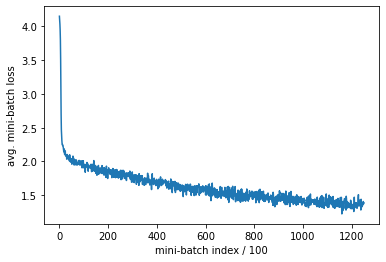

In [74]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [75]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net7(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 52 %


In [76]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net7(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 57 %
Accuracy of   car : 68 %
Accuracy of  bird : 30 %
Accuracy of   cat : 48 %
Accuracy of  deer : 38 %
Accuracy of   dog : 32 %
Accuracy of  frog : 60 %
Accuracy of horse : 61 %
Accuracy of  ship : 68 %
Accuracy of truck : 54 %


### Adam Optimizer and Loss Function

In [77]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net7.parameters(), lr=0.001) 

#### Training Procedure

In [78]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net7(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 3.744
[epoch: 0, i:   199] avg mini-batch loss: 2.798
[epoch: 0, i:   299] avg mini-batch loss: 2.576
[epoch: 0, i:   399] avg mini-batch loss: 2.444
[epoch: 0, i:   499] avg mini-batch loss: 2.497
[epoch: 0, i:   599] avg mini-batch loss: 2.553
[epoch: 0, i:   699] avg mini-batch loss: 2.537
[epoch: 0, i:   799] avg mini-batch loss: 2.561
[epoch: 0, i:   899] avg mini-batch loss: 2.380
[epoch: 0, i:   999] avg mini-batch loss: 2.387
[epoch: 0, i:  1099] avg mini-batch loss: 2.270
[epoch: 0, i:  1199] avg mini-batch loss: 2.458
[epoch: 0, i:  1299] avg mini-batch loss: 2.356
[epoch: 0, i:  1399] avg mini-batch loss: 2.317
[epoch: 0, i:  1499] avg mini-batch loss: 2.174
[epoch: 0, i:  1599] avg mini-batch loss: 2.361
[epoch: 0, i:  1699] avg mini-batch loss: 2.228
[epoch: 0, i:  1799] avg mini-batch loss: 2.323
[epoch: 0, i:  1899] avg mini-batch loss: 2.383
[epoch: 0, i:  1999] avg mini-batch loss: 2.448
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

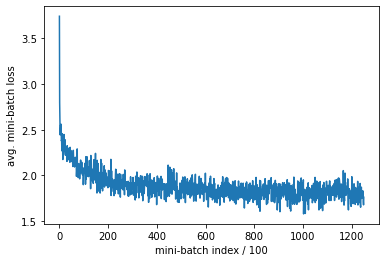

In [79]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [80]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net7(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %


In [81]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net7(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 40 %
Accuracy of   car : 86 %
Accuracy of  bird : 13 %
Accuracy of   cat : 35 %
Accuracy of  deer :  3 %
Accuracy of   dog : 19 %
Accuracy of  frog : 76 %
Accuracy of horse : 69 %
Accuracy of  ship : 37 %
Accuracy of truck : 21 %


## Part 8

### Network (Max Pooling and Tanh)

In [82]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.tahn = nn.Tanh()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.tahn = nn.Tanh()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.tahn = nn.Tanh()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2))

        self.fc1 = nn.Linear(2048, 1024)
        self.tahn = nn.Tanh()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.tahn(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.tahn(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.tahn(x)
        x = self.maxpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = nn.Tanh()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net8 = Net()     # Create the network instance.
net8.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (tahn): Tanh()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (maxpool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [83]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net8.parameters(), lr=0.001) 

#### Training Procedure

In [84]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net8(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 4.119
[epoch: 0, i:   199] avg mini-batch loss: 3.997
[epoch: 0, i:   299] avg mini-batch loss: 3.816
[epoch: 0, i:   399] avg mini-batch loss: 3.488
[epoch: 0, i:   499] avg mini-batch loss: 2.994
[epoch: 0, i:   599] avg mini-batch loss: 2.609
[epoch: 0, i:   699] avg mini-batch loss: 2.459
[epoch: 0, i:   799] avg mini-batch loss: 2.367
[epoch: 0, i:   899] avg mini-batch loss: 2.321
[epoch: 0, i:   999] avg mini-batch loss: 2.261
[epoch: 0, i:  1099] avg mini-batch loss: 2.263
[epoch: 0, i:  1199] avg mini-batch loss: 2.228
[epoch: 0, i:  1299] avg mini-batch loss: 2.203
[epoch: 0, i:  1399] avg mini-batch loss: 2.197
[epoch: 0, i:  1499] avg mini-batch loss: 2.192
[epoch: 0, i:  1599] avg mini-batch loss: 2.173
[epoch: 0, i:  1699] avg mini-batch loss: 2.186
[epoch: 0, i:  1799] avg mini-batch loss: 2.186
[epoch: 0, i:  1899] avg mini-batch loss: 2.151
[epoch: 0, i:  1999] avg mini-batch loss: 2.174
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

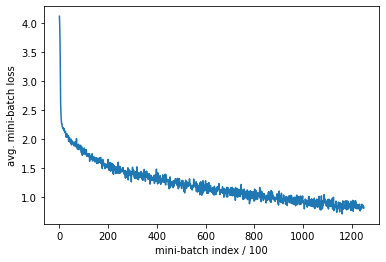

In [85]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [86]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net8(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [87]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net8(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 83 %
Accuracy of  bird : 60 %
Accuracy of   cat : 32 %
Accuracy of  deer : 64 %
Accuracy of   dog : 66 %
Accuracy of  frog : 70 %
Accuracy of horse : 74 %
Accuracy of  ship : 71 %
Accuracy of truck : 75 %


### Adam Optimizer and Loss Function

In [88]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.Adam(net8.parameters(), lr=0.001) 

#### Training Procedure

In [89]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net8(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 5.090
[epoch: 0, i:   199] avg mini-batch loss: 2.362
[epoch: 0, i:   299] avg mini-batch loss: 2.227
[epoch: 0, i:   399] avg mini-batch loss: 2.409
[epoch: 0, i:   499] avg mini-batch loss: 2.287
[epoch: 0, i:   599] avg mini-batch loss: 2.264
[epoch: 0, i:   699] avg mini-batch loss: 2.081
[epoch: 0, i:   799] avg mini-batch loss: 2.202
[epoch: 0, i:   899] avg mini-batch loss: 2.060
[epoch: 0, i:   999] avg mini-batch loss: 2.111
[epoch: 0, i:  1099] avg mini-batch loss: 1.955
[epoch: 0, i:  1199] avg mini-batch loss: 2.050
[epoch: 0, i:  1299] avg mini-batch loss: 2.296
[epoch: 0, i:  1399] avg mini-batch loss: 2.079
[epoch: 0, i:  1499] avg mini-batch loss: 1.983
[epoch: 0, i:  1599] avg mini-batch loss: 2.052
[epoch: 0, i:  1699] avg mini-batch loss: 1.930
[epoch: 0, i:  1799] avg mini-batch loss: 2.088
[epoch: 0, i:  1899] avg mini-batch loss: 2.105
[epoch: 0, i:  1999] avg mini-batch loss: 1.954
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

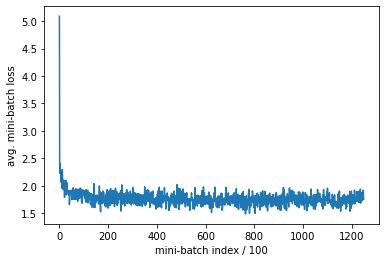

In [90]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [91]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net8(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 40 %


In [92]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net8(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 49 %
Accuracy of   car : 72 %
Accuracy of  bird : 25 %
Accuracy of   cat :  0 %
Accuracy of  deer : 12 %
Accuracy of   dog : 69 %
Accuracy of  frog : 81 %
Accuracy of horse : 57 %
Accuracy of  ship : 24 %
Accuracy of truck : 13 %


## Adjusting the worst performing CNN for this architecture

### Adding droppout and batching ELU Avg Pooling

In [230]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.bn1 = nn.BatchNorm2d(128)
        self.elu = nn.ELU()
        self.avgpool1 = nn.AvgPool2d(kernel_size=(2, 2))
        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.bn2 = nn.BatchNorm2d(256)
        self.elu = nn.ELU()
        self.avgpool2 = nn.AvgPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.bn3 = nn.BatchNorm2d(512)
        self.elu = nn.ELU()
        self.avgpool3 = nn.AvgPool2d(kernel_size=(2, 2))
        
        self.drop = nn.Dropout(0.5)

        self.fc1 = nn.Linear(2048, 1024)
        self.elu = nn.ELU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.elu(x)
        x = self.avgpool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.elu(x)
        x = self.avgpool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.elu(x)
        x = self.avgpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = self.drop(x)
        x = nn.ELU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net9 = Net()     # Create the network instance.
net9.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (elu): ELU(alpha=1.0)
  (avgpool1): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool2): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool3): AvgPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0)
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [231]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net9.parameters(), lr=0.001) 

#### Training Procedure

In [232]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net9(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 3.895
[epoch: 0, i:   199] avg mini-batch loss: 3.454
[epoch: 0, i:   299] avg mini-batch loss: 3.160
[epoch: 0, i:   399] avg mini-batch loss: 2.718
[epoch: 0, i:   499] avg mini-batch loss: 2.531
[epoch: 0, i:   599] avg mini-batch loss: 2.511
[epoch: 0, i:   699] avg mini-batch loss: 2.299
[epoch: 0, i:   799] avg mini-batch loss: 2.250
[epoch: 0, i:   899] avg mini-batch loss: 2.213
[epoch: 0, i:   999] avg mini-batch loss: 2.143
[epoch: 0, i:  1099] avg mini-batch loss: 1.983
[epoch: 0, i:  1199] avg mini-batch loss: 1.979
[epoch: 0, i:  1299] avg mini-batch loss: 1.991
[epoch: 0, i:  1399] avg mini-batch loss: 1.966
[epoch: 0, i:  1499] avg mini-batch loss: 1.926
[epoch: 0, i:  1599] avg mini-batch loss: 1.944
[epoch: 0, i:  1699] avg mini-batch loss: 1.772
[epoch: 0, i:  1799] avg mini-batch loss: 1.782
[epoch: 0, i:  1899] avg mini-batch loss: 1.826
[epoch: 0, i:  1999] avg mini-batch loss: 1.846
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

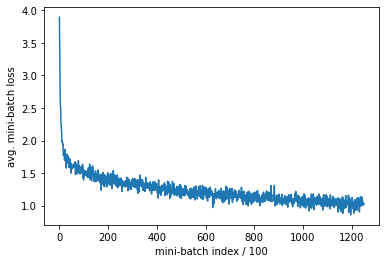

In [233]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [234]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net9(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [235]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net9(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 69 %
Accuracy of   car : 77 %
Accuracy of  bird : 43 %
Accuracy of   cat : 42 %
Accuracy of  deer : 55 %
Accuracy of   dog : 52 %
Accuracy of  frog : 76 %
Accuracy of horse : 70 %
Accuracy of  ship : 75 %
Accuracy of truck : 67 %


### Adam Optimizer and Loss Function

In [236]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net9.parameters(), lr=0.001) 

#### Training Procedure

In [237]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net9(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 1.045
[epoch: 0, i:   199] avg mini-batch loss: 1.028
[epoch: 0, i:   299] avg mini-batch loss: 1.105
[epoch: 0, i:   399] avg mini-batch loss: 1.007
[epoch: 0, i:   499] avg mini-batch loss: 0.902
[epoch: 0, i:   599] avg mini-batch loss: 1.014
[epoch: 0, i:   699] avg mini-batch loss: 0.995
[epoch: 0, i:   799] avg mini-batch loss: 0.954
[epoch: 0, i:   899] avg mini-batch loss: 1.056
[epoch: 0, i:   999] avg mini-batch loss: 0.988
[epoch: 0, i:  1099] avg mini-batch loss: 0.972
[epoch: 0, i:  1199] avg mini-batch loss: 0.972
[epoch: 0, i:  1299] avg mini-batch loss: 0.987
[epoch: 0, i:  1399] avg mini-batch loss: 1.000
[epoch: 0, i:  1499] avg mini-batch loss: 1.044
[epoch: 0, i:  1599] avg mini-batch loss: 0.973
[epoch: 0, i:  1699] avg mini-batch loss: 1.117
[epoch: 0, i:  1799] avg mini-batch loss: 1.026
[epoch: 0, i:  1899] avg mini-batch loss: 1.017
[epoch: 0, i:  1999] avg mini-batch loss: 0.959
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

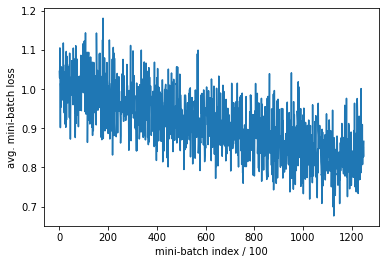

In [238]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [239]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net9(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


In [240]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net9(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 78 %
Accuracy of   car : 84 %
Accuracy of  bird : 56 %
Accuracy of   cat : 50 %
Accuracy of  deer : 67 %
Accuracy of   dog : 49 %
Accuracy of  frog : 79 %
Accuracy of horse : 73 %
Accuracy of  ship : 73 %
Accuracy of truck : 74 %


### Adding droppout and batching ELU Max Pooling

In [241]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels = (3), out_channels = (128), kernel_size = (3,3))
        self.bn1 = nn.BatchNorm2d(128)
        self.elu = nn.ELU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2))        
        
        self.conv2 = nn.Conv2d(in_channels = (128), out_channels = (256), kernel_size = (3,3))
        self.bn2 = nn.BatchNorm2d(256)
        self.elu = nn.ELU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2))

        self.conv3 = nn.Conv2d(in_channels = (256), out_channels = (512), kernel_size = (3,3))
        self.bn3 = nn.BatchNorm2d(512)
        self.elu = nn.ELU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=(2, 2))
        
        self.drop = nn.Dropout(0.5)

        self.fc1 = nn.Linear(2048, 1024)
        self.elu = nn.ELU()
        self.fc2 = nn.Linear(1024, 64)

        
        
        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.elu(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.elu(x)
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.elu(x)
        x = self.maxpool3(x)
        
        x = torch.flatten(x, start_dim=1) 
        x = self.drop(x)
        x = nn.ELU()(self.fc1(x))
        out = self.fc2(x)
        
        
        
        return out

net10 = Net()     # Create the network instance.
net10.to(device) 

Net(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (elu): ELU(alpha=1.0)
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=64, bias=True)
)

### SGD Optimizer and Loss Function

In [242]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net10.parameters(), lr=0.001) 

#### Training Procedure

In [243]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net10(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 3.051
[epoch: 0, i:   199] avg mini-batch loss: 2.200
[epoch: 0, i:   299] avg mini-batch loss: 2.095
[epoch: 0, i:   399] avg mini-batch loss: 2.014
[epoch: 0, i:   499] avg mini-batch loss: 1.979
[epoch: 0, i:   599] avg mini-batch loss: 1.914
[epoch: 0, i:   699] avg mini-batch loss: 1.842
[epoch: 0, i:   799] avg mini-batch loss: 1.895
[epoch: 0, i:   899] avg mini-batch loss: 1.861
[epoch: 0, i:   999] avg mini-batch loss: 1.785
[epoch: 0, i:  1099] avg mini-batch loss: 1.845
[epoch: 0, i:  1199] avg mini-batch loss: 1.738
[epoch: 0, i:  1299] avg mini-batch loss: 1.765
[epoch: 0, i:  1399] avg mini-batch loss: 1.767
[epoch: 0, i:  1499] avg mini-batch loss: 1.792
[epoch: 0, i:  1599] avg mini-batch loss: 1.643
[epoch: 0, i:  1699] avg mini-batch loss: 1.684
[epoch: 0, i:  1799] avg mini-batch loss: 1.692
[epoch: 0, i:  1899] avg mini-batch loss: 1.634
[epoch: 0, i:  1999] avg mini-batch loss: 1.701
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

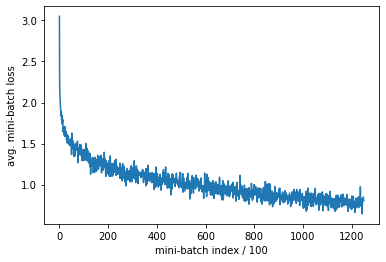

In [244]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [245]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net10(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


In [246]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net10(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 78 %
Accuracy of  bird : 58 %
Accuracy of   cat : 43 %
Accuracy of  deer : 53 %
Accuracy of   dog : 67 %
Accuracy of  frog : 70 %
Accuracy of horse : 73 %
Accuracy of  ship : 84 %
Accuracy of truck : 80 %


### Adam Optimizer and Loss Function

In [247]:
# We use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# We use Adam as optimizer.
opt = optim.SGD(net10.parameters(), lr=0.001) 

#### Training Procedure

In [248]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = net10(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 0.717
[epoch: 0, i:   199] avg mini-batch loss: 0.798
[epoch: 0, i:   299] avg mini-batch loss: 0.750
[epoch: 0, i:   399] avg mini-batch loss: 0.700
[epoch: 0, i:   499] avg mini-batch loss: 0.758
[epoch: 0, i:   599] avg mini-batch loss: 0.739
[epoch: 0, i:   699] avg mini-batch loss: 0.685
[epoch: 0, i:   799] avg mini-batch loss: 0.691
[epoch: 0, i:   899] avg mini-batch loss: 0.810
[epoch: 0, i:   999] avg mini-batch loss: 0.644
[epoch: 0, i:  1099] avg mini-batch loss: 0.718
[epoch: 0, i:  1199] avg mini-batch loss: 0.733
[epoch: 0, i:  1299] avg mini-batch loss: 0.750
[epoch: 0, i:  1399] avg mini-batch loss: 0.734
[epoch: 0, i:  1499] avg mini-batch loss: 0.854
[epoch: 0, i:  1599] avg mini-batch loss: 0.723
[epoch: 0, i:  1699] avg mini-batch loss: 0.788
[epoch: 0, i:  1799] avg mini-batch loss: 0.647
[epoch: 0, i:  1899] avg mini-batch loss: 0.713
[epoch: 0, i:  1999] avg mini-batch loss: 0.799
[epoch: 0, i:  2099] avg mini-batch loss

#### Training Loss Curve

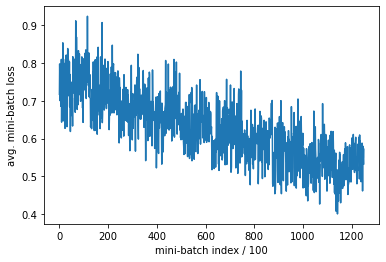

In [249]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

#### Evaluate on Test Dataset

In [250]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net10(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


In [251]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net10(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 82 %
Accuracy of  bird : 57 %
Accuracy of   cat : 55 %
Accuracy of  deer : 71 %
Accuracy of   dog : 60 %
Accuracy of  frog : 77 %
Accuracy of horse : 69 %
Accuracy of  ship : 83 %
Accuracy of truck : 76 %
